# Titanic Project in Python

##Chengyao Gu 05/2015
This is a solution using Python to create predictive models to determine who survived the Titanic disaster. 

#Part 1: Loading and Separating Dataset

In [6]:
# Use pandas to import dataset
import pandas as pd
from pandas import Series,DataFrame
from sklearn.cross_validation import train_test_split

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('Titanic/titanic_full.csv')

In [7]:
import sklearn
from sklearn.cross_validation import train_test_split

# Create a training set and a test set of the data using a 70%/30% split
titanic_df_train, titanic_df_test = train_test_split(titanic_df, test_size=0.3, random_state=42)

titanic_df_train.head(5)

,survived,name,sex,age,sibsp,parch,pclass,ticket,fare,cabin,embarked,boat,body,home.dest
1214,0,"Smiljanic, Mr. Mile",male,NaN,0,0,3,315037,8.6625,NaN,S,NaN,NaN,NaN
677,0,"Bostandyeff, Mr. Guentcho",male,26,0,0,3,349224,7.8958,NaN,S,NaN,NaN,"Bulgaria Chicago, IL"
534,1,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19,0,0,2,250655,26.0000,NaN,S,11,NaN,"Worcester, England"
1174,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,3,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
864,0,"Henriksson, Miss. Jenny Lovisa",female,28,0,0,3,347086,7.7750,NaN,S,NaN,NaN,NaN


In [8]:
# Get overall info for the training set
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1214 to 1126
Data columns (total 14 columns):
survived     916 non-null int64
name         916 non-null object
sex          916 non-null object
age          729 non-null float64
sibsp        916 non-null int64
parch        916 non-null int64
pclass       916 non-null int64
ticket       916 non-null object
fare         915 non-null float64
cabin        204 non-null object
embarked     915 non-null object
boat         327 non-null object
body         85 non-null float64
home.dest    510 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 107.3+ KB


In [9]:
# Get a statistical summary of the numeric columns
titanic_df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,916,0.361354,0.480655,0.0000,0.000,0.0,1.000,1.0000
age,729,29.102309,13.866954,0.1667,21.000,28.0,37.000,80.0000
sibsp,916,0.539301,1.082188,0.0000,0.000,0.0,1.000,8.0000
parch,916,0.386463,0.893933,0.0000,0.000,0.0,0.000,9.0000
pclass,916,2.305677,0.841811,1.0000,2.000,3.0,3.000,3.0000
fare,915,33.709221,52.840656,0.0000,7.925,14.5,31.275,512.3292
body,85,165.976471,101.709317,1.0000,75.000,172.0,261.000,328.0000


#Part 2: Plotting and Exploring Data

In [10]:
# Import packages needed for the analysis and visualization
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

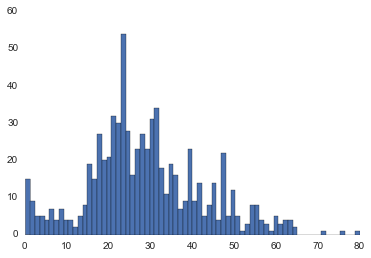

In [11]:
# Create a histogram about age using pandas
titanic_df_train['age'].hist(bins=70)

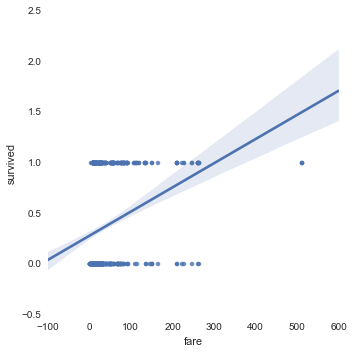

In [12]:
# Using seabron to create a linear fit between fare and survival
sns.lmplot('fare','survived',data = titanic_df_train)

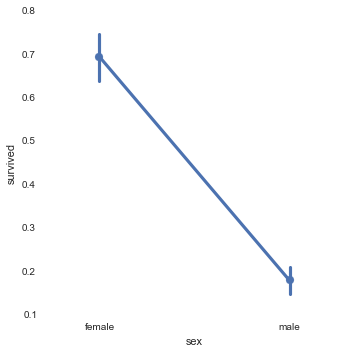

In [13]:
# Try the factorplot for sex and survival ratio
sns.factorplot('sex', 'survived', data=titanic_df_train)

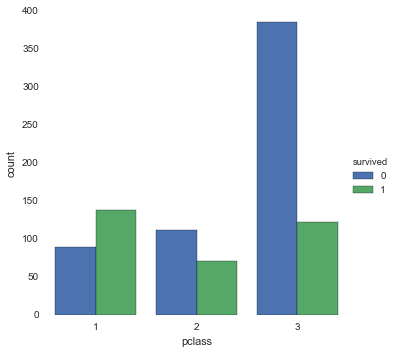

In [14]:
# Try the factorplot again, for passenger class and survival ratio
sns.factorplot('pclass', data=titanic_df_train, hue='survived')

In [15]:
# Revisit the data type of each column
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1214 to 1126
Data columns (total 14 columns):
survived     916 non-null int64
name         916 non-null object
sex          916 non-null object
age          729 non-null float64
sibsp        916 non-null int64
parch        916 non-null int64
pclass       916 non-null int64
ticket       916 non-null object
fare         915 non-null float64
cabin        204 non-null object
embarked     915 non-null object
boat         327 non-null object
body         85 non-null float64
home.dest    510 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 107.3+ KB


In [16]:
# Select numeric columns, not including 'body' column as it has too many null values
titanic_cor = titanic_df_train[['survived', 'age', 'sibsp', 'parch', 'pclass', 'fare']]

# Calculate correlation metrix
R = titanic_cor.corr()
R

,survived,age,sibsp,parch,pclass,fare
survived,1.000000,-0.014920,-0.013675,0.071425,-0.316505,0.261934
age,-0.014920,1.000000,-0.246946,-0.174866,-0.384467,0.137666
sibsp,-0.013675,-0.246946,1.000000,0.367258,0.061178,0.158024
parch,0.071425,-0.174866,0.367258,1.000000,0.038908,0.214890
pclass,-0.316505,-0.384467,0.061178,0.038908,1.000000,-0.555562
fare,0.261934,0.137666,0.158024,0.214890,-0.555562,1.000000


In [17]:
# Plot the correlation metrix
from pylab import pcolor, show, colorbar, xticks, yticks

pcolor(R)
colorbar()
yticks(np.arange(0.5,6.5),range(0,6))
xticks(np.arange(0.5,6.5),range(0,6))
show()

ImportError: cannot import name pcolor

#Part 3: Preparing Data
## 3.1 Dealing with Missing Values

In [18]:
# Check the percent of the NaN data in each column
titanic_df_train.isnull().sum()/len(titanic_df_train)

survived     0.000000
name         0.000000
sex          0.000000
age          0.204148
sibsp        0.000000
parch        0.000000
pclass       0.000000
ticket       0.000000
fare         0.001092
cabin        0.777293
embarked     0.001092
boat         0.643013
body         0.907205
home.dest    0.443231
dtype: float64

In [19]:
# we probably won't use the body, boat, home.dest, or cabin data, since they have too many null values, so no need to fix

# Meanwhile, we replace the nulls in age, fare and embarked columns using median values
titanic_df_train['fare'].loc[titanic_df_train['fare'].isnull()] = titanic_df_train['fare'].median()

titanic_df_train['embarked'].loc[titanic_df_train['embarked'].isnull()] = 'C'

# Replace age by median age of the same sex
import math
ageGroup = titanic_df_train['age'].groupby(titanic_df_train['sex'])
ageGroupMed = ageGroup.median()

# First let's make a function to sort through the sex 
def fill_age_by_sex(passenger):
    # Take the age and sex
    age,sex = passenger
    # Check the age. If empty, tehn fill by median age of the same sex
    if math.isnan(age):
        return ageGroupMed[sex]
    else:
        return age

# Then define a new column called 'ageFill'; specify axis=1 for columns and not index
titanic_df_train['ageFill'] = titanic_df_train[['age','sex']].apply(fill_age_by_sex,axis=1)

C:\Users\cgu018\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\cgu018\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\cgu018\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\cg

In [20]:
# Do the same with the testing set

titanic_df_test['fare'].loc[titanic_df_test['fare'].isnull()] = titanic_df_test['fare'].median()

titanic_df_test['embarked'].loc[titanic_df_test['embarked'].isnull()] = 'C'

# Replace age by median age of the same sex
ageGroup2 = titanic_df_test['age'].groupby(titanic_df_test['sex'])
ageGroupMed2 = ageGroup2.median()

# First let's make a function to sort through the sex 
def fill_age_by_sex2(passenger):
    # Take the age and sex
    age,sex = passenger
    # Check the age. If empty, tehn fill by median age of the same sex
    if math.isnan(age):
        return ageGroupMed2[sex]
    else:
        return age

# Then define a new column called 'ageFill'; specify axis=1 for columns and not index
titanic_df_test['ageFill'] = titanic_df_test[['age','sex']].apply(fill_age_by_sex2,axis=1)

C:\Users\cgu018\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\cgu018\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\cgu018\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

##3.2 Dealing with Categorical Variables
Unlike in R where regression model functions can deal with categorical variable as factors, in Python we need to create dummy variables to achieve the same thing

In [21]:
# Create new DataFrames for the Categorical Variables
sex_dummies = pd.get_dummies(titanic_df_train['sex'])
pclass_dummies = pd.get_dummies(titanic_df_train['pclass'])
embarked_dummies = pd.get_dummies(titanic_df_train['embarked'])

# Create column names for the new DataFrames; no need for 'sex' as it is already readable
pclass_dummies.columns = ['pclass1','pclass2','pclass3']
embarked_dummies.columns = ['embarkedC','embarkedQ','embarkedS']

Create the X and Y data sets for prediction

In [22]:
# Set X as new DataFrame without the occupation columns or the Y target
X = titanic_df_train[['sibsp','parch','fare','ageFill']]

# Concat the dummy DataFrames Together
dummies = pd.concat([sex_dummies,pclass_dummies,embarked_dummies],axis=1)

# Concatenate the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

# To resolve multicollinearity issue, drop one column of each dummy variable set to avoid multicollinearity
X = X.drop('female',axis=1)
X = X.drop('pclass1',axis=1)
X = X.drop('embarkedC',axis=1)

# Preview X
X.head()

,sibsp,parch,fare,ageFill,male,pclass2,pclass3,embarkedQ,embarkedS
1214,0,0,8.6625,28,1,0,1,0,1
677,0,0,7.8958,26,1,0,1,0,1
534,0,0,26.0000,19,0,1,0,0,1
1174,8,2,69.5500,27,0,0,1,0,1
864,0,0,7.7750,28,0,0,1,0,1


In [89]:
# Set Y as Target class, survived
Y = titanic_df_train.survived

# To use the Y with SciKit Learn, we need to set it as a 1-D array, i.e. "flatten" the array.
Y = np.ravel(Y)

# Preview Y
#Y

In [24]:
# Prepare the same thing with test dataset
# Create new DataFrames for the Categorical Variables
sex_dummies2 = pd.get_dummies(titanic_df_test['sex'])
pclass_dummies2 = pd.get_dummies(titanic_df_test['pclass'])
embarked_dummies2 = pd.get_dummies(titanic_df_test['embarked'])

# Create column names for the new DataFrames; no need for 'sex' as it is already readable
pclass_dummies2.columns = ['pclass1','pclass2','pclass3']
embarked_dummies2.columns = ['embarkedC','embarkedQ','embarkedS']

# Set X as new DataFrame without the occupation columns or the Y target
X2 = titanic_df_test[['sibsp','parch','fare','ageFill']]

# Concat the dummy DataFrames Together
dummies2 = pd.concat([sex_dummies2,pclass_dummies2,embarked_dummies2],axis=1)

# Concatenate the X DataFrame with the dummy variables
X2 = pd.concat([X2,dummies2],axis=1)

# To resolve multicollinearity issue, drop one column of each dummy variable set to avoid multicollinearity
X2 = X2.drop('female',axis=1)
X2 = X2.drop('pclass1',axis=1)
X2 = X2.drop('embarkedC',axis=1)

# Set Y as Target class, survived
Y2 = titanic_df_test.survived

# To use the Y with SciKit Learn, we need to set it as a 1-D array, i.e. "flatten" the array.
Y2 = np.ravel(Y2)

#Part 4: Prediction
##4.1 Linear Regression

In [25]:
# Import for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
lreg = LinearRegression()

# Implement Linear Regression
lreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print ' The estimated intercept coefficient is %.2f ' %lreg.intercept_ 
print ' The number of coefficients used was %d ' % len(lreg.coef_)

 The estimated intercept coefficient is 1.06 
 The number of coefficients used was 9 


In [27]:
# Show coeff of linear model
coeff_df = DataFrame(X.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,sibsp,-0.032375
1,parch,-0.010551
2,fare,0.000317
3,ageFill,-0.003800
4,male,-0.481030
5,pclass2,-0.139930
6,pclass3,-0.282105
7,embarkedQ,-0.101999
8,embarkedS,-0.101050


In [68]:
# Predictions on testing sets
pred_test = lreg.predict(X2)

from sklearn.metrics import r2_score

DataFrame(columns=('Model', 'Accuracy'))
modAcc1 = r2_score(Y2, pred_test)
modAcc1

0.39311208920558516

In [70]:
# Create a series holding accuracy data for later comparison
models = ['LinearReg', 'LogisticReg', 'KNearestNeighbor', 'RandomForest', 'DecisionTree']
modelAcc = Series([modAcc1,0,0,0,0], index=models)

LinearReg           0.393112
LogisticReg         0.000000
KNearestNeighbor    0.000000
RandomForest        0.000000
DecisionTree        0.000000
dtype: float64

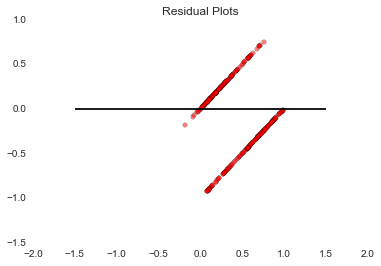

In [66]:
# Residual Plots
# Scatter plot the training data
test = plt.scatter(pred_test,(pred_test-Y2),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-1.5,xmax=1.5)

#Labels
plt.title('Residual Plots')

##4.2 Logistic Regression

In [30]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression

# Make a new logistic_model
log_model = LogisticRegression()

# Now fit the new model using training dataset X and Y
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [74]:
# For evaluating our ML results
from sklearn import metrics

# Predict the classes of the testing data set
class_predict = log_model.predict(X2)

# Compare the predicted classes to the actual test classes
modAcc2 = metrics.accuracy_score(Y2,class_predict)
modelAcc['LogisticReg'] = modAcc2
print modAcc2

0.796437659033


In [73]:
ww2_cas = Series([8700000,4300000,3000000,2100000,400000],index=['USSR','Germany','China','Japan','USA'])
ww2_cas['USA']

400000

In [32]:
# However compared to the null error rate, the logistic model is not that good.
1-Y.mean()

0.638646288209607

In [33]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df

,0,1
0,sibsp,[-0.218522707725]
1,parch,[-0.0663570365266]
2,fare,[0.00397123406874]
3,ageFill,[-0.0169714889191]
4,male,[-2.3524113758]
5,pclass2,[-0.520098479484]
6,pclass3,[-1.35790197034]
7,embarkedQ,[-0.499639022736]
8,embarkedS,[-0.502209002293]


From the coefficients we see that a positive coeffecient corresponds to increasing the likelihood of survival while a negative coefficient means it corresponds to a decreased likelihood of survival as the actual data value point increases.

An increased ticket fare corresponded to a increase in the likelihood of survival. Increased number of sibling/spouse/parent/children seems to correspond to a decrease in the likelihood of survival.

Since all the dummy variables (the sex (male), pclass and embarded) are negative that means the highest likelihood of survival corresponds to the baseline variable we dropped (female, pclase1, and embarkedC).

##4.3 Classification - K-Nearest Neighbors

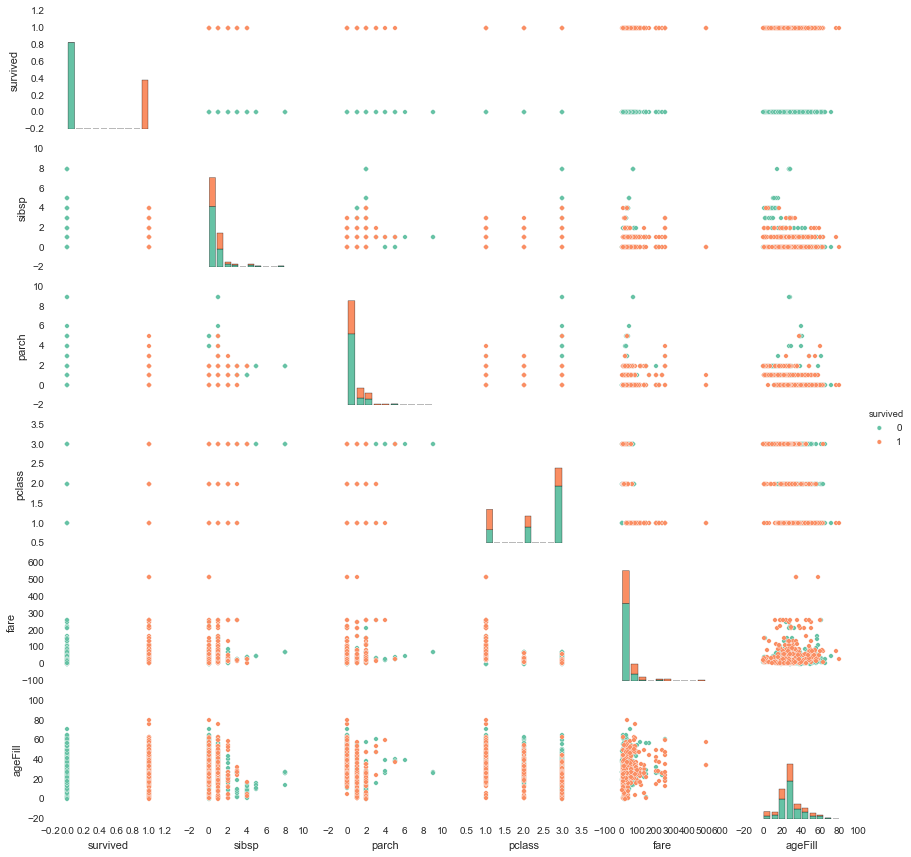

In [47]:
# Create a dataframe with both the usable predictors and target variable there.
XY = titanic_df_train.drop('age',axis=1)
XY = XY.drop('cabin',axis=1)
XY = XY.drop('boat',axis=1)
XY = XY.drop('body',axis=1)
XY = XY.drop('home.dest',axis=1)

# Do the same thing with test dataset
XY2 = titanic_df_test.drop('age',axis=1)
XY2 = XY2.drop('cabin',axis=1)
XY2 = XY2.drop('boat',axis=1)
XY2 = XY2.drop('body',axis=1)
XY2 = XY2.drop('home.dest',axis=1)

# First a pairplot of all the different features
sns.pairplot(XY,hue='survived',size=2,palette='Set2')

In [75]:
# Import the kNeighbors Classifiers 
from sklearn.neighbors import KNeighborsClassifier

# First start with k=6
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X,Y)
Y_pred = knn.predict(X2)

# Check Accuracy against the Testing Set
modAcc3 = metrics.accuracy_score(Y2,Y_pred)
modelAcc['KNearestNeighbor'] = modAcc3
print modAcc3

0.638676844784


In [36]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,Y)
    Y_pred = knn.predict(X2)
    accuracy.append(metrics.accuracy_score(Y2, Y_pred))

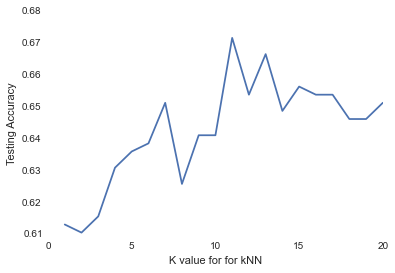

In [37]:
# Plot the accuracy by various k values
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

## 4.4 Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X, Y)

# Check the accuracy of Random Forest
modAcc4 = rf.score(X2, Y2)
modelAcc['RandomForest'] = modAcc4
print modAcc4

0.778625954198


##4.5 Decision Tree

In [80]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X, Y)

# Check the accuracy of Decision Tree
modAcc5 = dt.score(X2, Y2)
modelAcc['DecisionTree'] = modAcc5
print modAcc5

0.737913486005


In [58]:
# Print variable importance
print DataFrame(dt.feature_importances_, columns = ["Importance"], index = X.columns)

           Importance
sibsp        0.042250
parch        0.027960
fare         0.253112
ageFill      0.260030
male         0.284362
pclass2      0.007409
pclass3      0.102206
embarkedQ    0.005112
embarkedS    0.017559


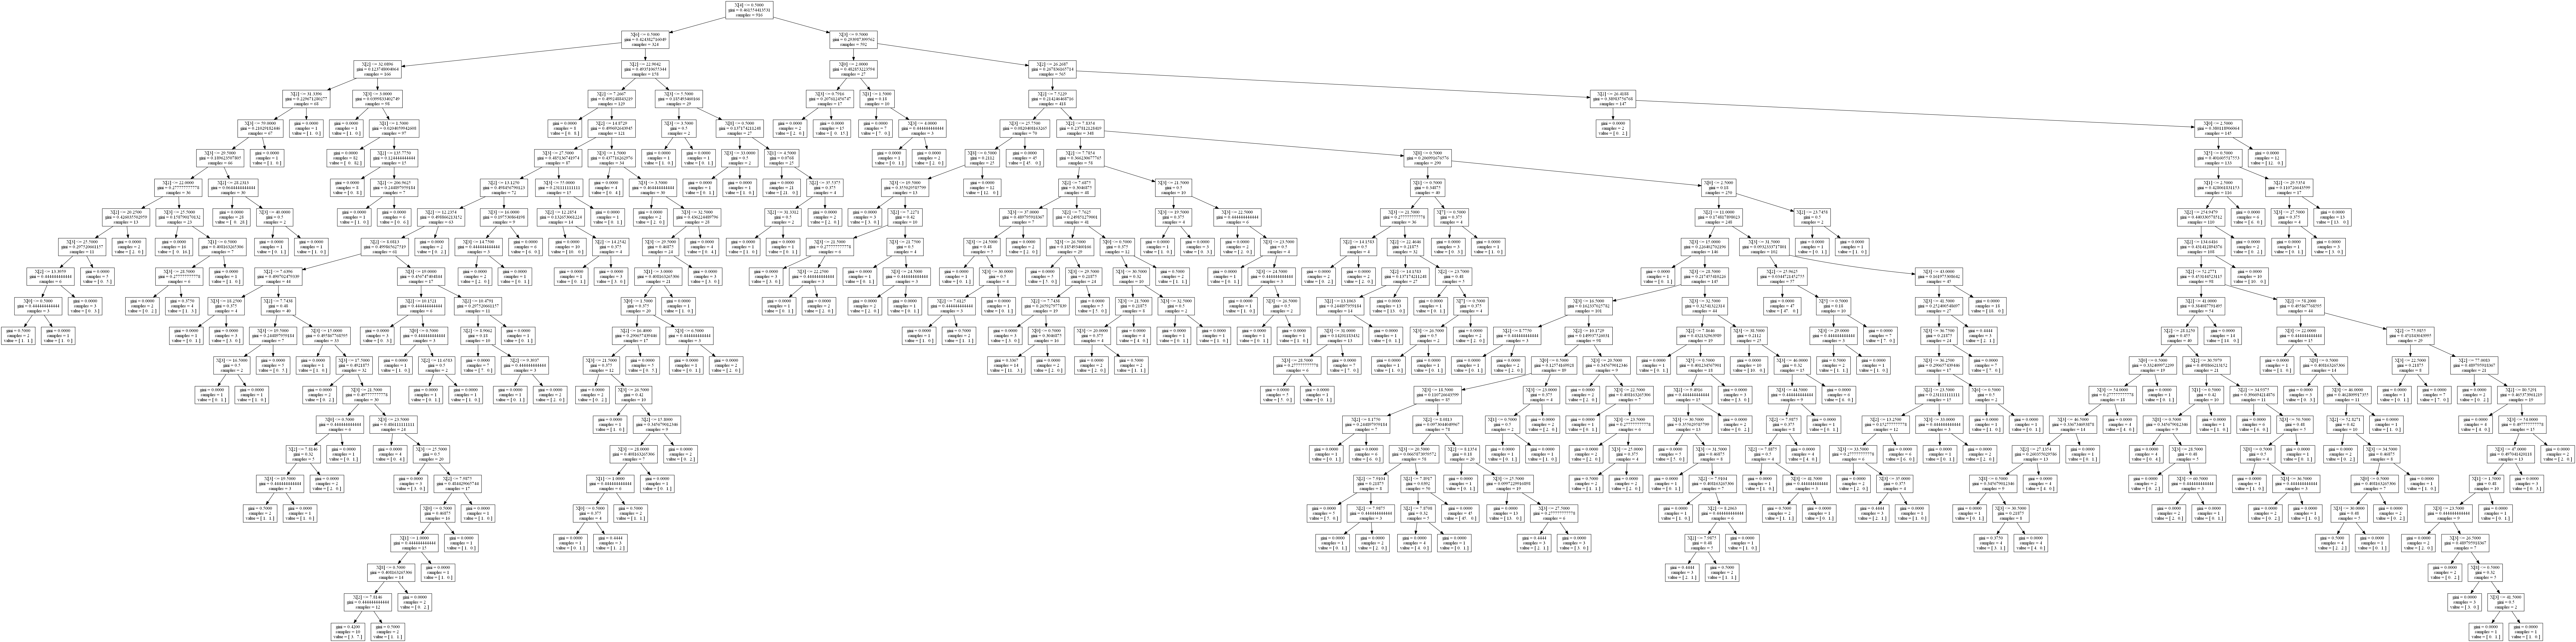

In [59]:
# Print the tree in an image
from sklearn.externals.six import StringIO  
import os
from os import system

with open("dtree.dot", 'w') as f:
    f=tree.export_graphviz(dt, out_file=f)
system('dot -Tpng dtree.dot -o dtree.png')
os.unlink('dtree.dot')

from IPython.display import Image
Image('dtree.png',width=1000, height=1000)

In [88]:
# Another way to print the tree
from sklearn.externals.six import StringIO  
import os
from os import system

out = StringIO()
tree.export_graphviz(dt, out_file=out)
#print out.getvalue()

## 4.6 Model Accuracy Comparison

In [83]:
modelAcc.order(ascending=False)

LogisticReg         0.796438
RandomForest        0.778626
DecisionTree        0.737913
KNearestNeighbor    0.638677
LinearReg           0.393112
dtype: float64